<a href="https://colab.research.google.com/github/harkpun/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Cardiovascular Risk Prediction </u></b>

## <b> What is Cardiovascular disease? <b>

Cardiovascular disease (CVD) is a general term for conditions affecting the heart or blood vessels. It's usually associated with a build-up of fatty deposits inside the arteries (atherosclerosis) and an increased risk of blood clots. It can also be associated with damage to arteries in organs such as the brain, heart, kidneys and eyes.

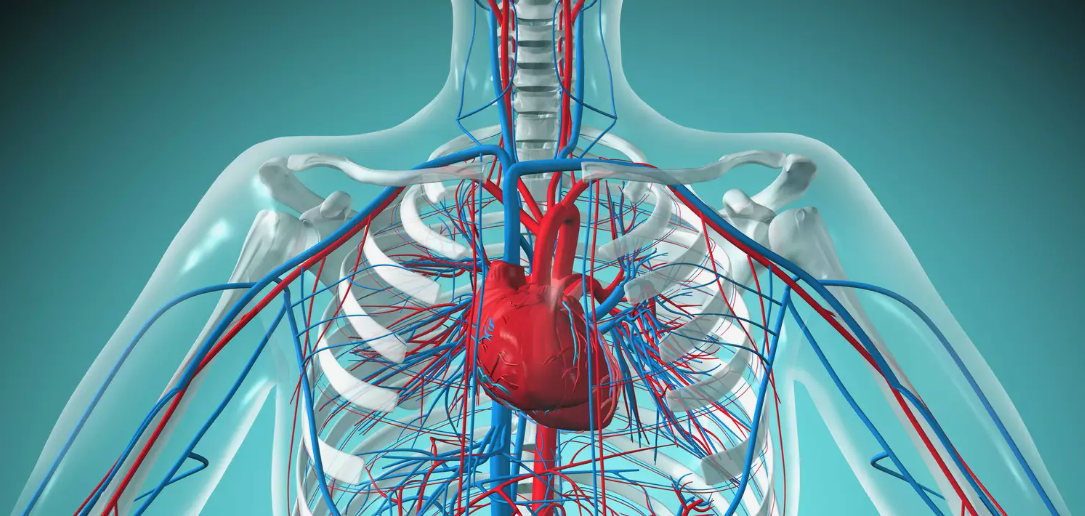


## **Data Description**

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.**

##### **Each attribute is a potential risk factor. These attributes are demographic, behavioral and medical risk factors.**

**Attribute Informations-**

Demographic
* ***Sex***: male or female("M" or "F")
* ***Age***: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral
* ***is_smoking***: whether or not the patient is a current smoker ("YES" or "NO")
* ***Cigs Per Day***: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)
* ***BP Meds***: whether or not the patient was on blood pressure medication (Nominal)
* ***Prevalent Stroke***: whether or not the patient had previously had a stroke (Nominal)
* ***Prevalent Hyp***: whether or not the patient was hypertensive (Nominal)
* ***Diabetes***: whether or not the patient had diabetes (Nominal)

Medical(current)
* ***Tot Chol***: total cholesterol level (Continuous)
* ***Sys BP***: systolic blood pressure (Continuous)
* ***Dia BP***: diastolic blood pressure (Continuous)
* ***BMI***: Body Mass Index (Continuous)
* ***Heart Rate***: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* ***Glucose***: glucose level (Continuous)

Predict variable (desired target)
* **10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV**

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score, roc_auc_score, plot_confusion_matrix, precision_score
from sklearn.metrics import make_scorer, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRFClassifier
from xgboost import XGBClassifier

from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.combine import SMOTETomek

import warnings
warnings.filterwarnings('ignore')

In [76]:
data = pd.read_csv('https://raw.githubusercontent.com/harkpun/Cardiovascular-Risk-Prediction/main/Data/data_cardiovascular_risk.csv', index_col='id')

In [77]:
df = data.copy()

In [78]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [79]:
df.shape

(3390, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [7]:
df.duplicated().sum()

0

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0
diaBP,3390.0,82.883038,12.023581,48.00,74.50,82.00,90.00,142.5


In [9]:
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## **EDA**

In [10]:
for col in df.columns:
  print(f'number of unique column in {col} is {df[col].nunique()}')
  print(f'{col} is {df[col].unique()}')
  print('='*50)

number of unique column in age is 39
age is [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]
number of unique column in education is 4
education is [ 2.  4.  1.  3. nan]
number of unique column in sex is 2
sex is ['F' 'M']
number of unique column in is_smoking is 2
is_smoking is ['YES' 'NO']
number of unique column in cigsPerDay is 32
cigsPerDay is [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]
number of unique column in BPMeds is 2
BPMeds is [ 0. nan  1.]
number of unique column in prevalentStroke is 2
prevalentStroke is [0 1]
number of unique column in prevalentHyp is 2
prevalentHyp is [0 1]
number of unique column in diabetes is 2
diabetes is [0 1]
number of unique column in totChol is 240
totChol is [221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 188. 240. 257. 267. 232. 199. 175. 164. 226. 248. 245. 2

### **Dealing with Null data**

In [11]:
print(f'Missing Data Count \n{df.isna().sum()[df.isna().sum()>0]}')
print('='*50)
print(f'Missing Data %  \n{df.isna().sum()[df.isna().sum()>0] / len(df)*100}')

Missing Data Count 
education      87
cigsPerDay     22
BPMeds         44
totChol        38
BMI            14
heartRate       1
glucose       304
dtype: int64
Missing Data %  
education     2.566372
cigsPerDay    0.648968
BPMeds        1.297935
totChol       1.120944
BMI           0.412979
heartRate     0.029499
glucose       8.967552
dtype: float64


**Missing data imputation**

* In dataset if feature has more than 10 unique values considered as Numerical features and those are filling with their Median value. 

* Remaining are considered as Categorical features and those are filling with their Mode value.

In [12]:
# imputing missing  values
for col in df.columns:
  
  if df[col].nunique() > 10:
    df[col] = df[col].fillna(df[col].median())
  else:
    df[col] = df[col].fillna(df[col].mode()[0])

In [13]:
df.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

### **Numeric and Category features**

In [14]:
numeric_features = []
category_features = []

for col in df.columns:
  
  if df[col].nunique() > 5:
    numeric_features.append(col)
  else:
    category_features.append(col)

print(f'numeric feature : {numeric_features}')
print(f'category feature : {category_features}')

numeric feature : ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
category feature : ['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


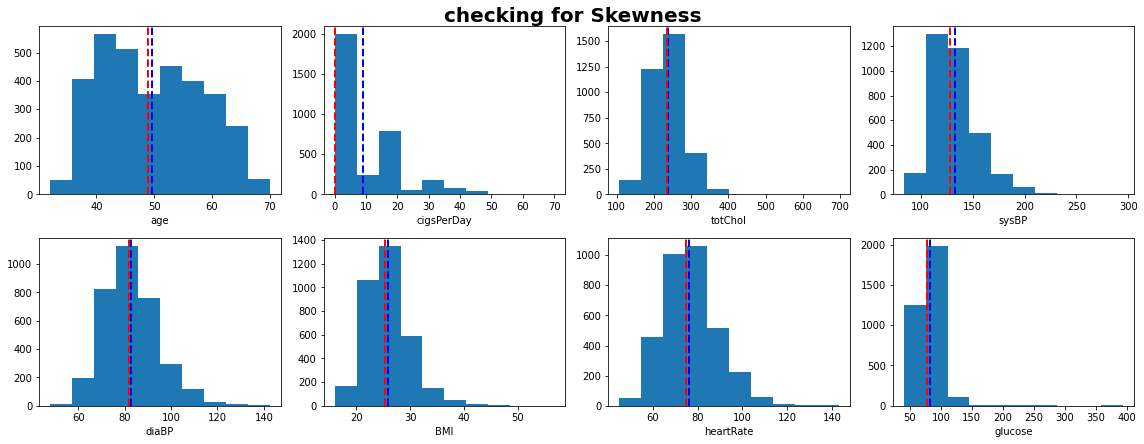

In [15]:
plt.figure(figsize=(16,6))
plt.suptitle('checking for Skewness', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2,4, i+1)
  plt.hist(df[col])
  plt.axvline(df[col].mean(), color='blue', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='red', linestyle='dashed', linewidth=2)   
  plt.xlabel(col) 
  plt.tight_layout()

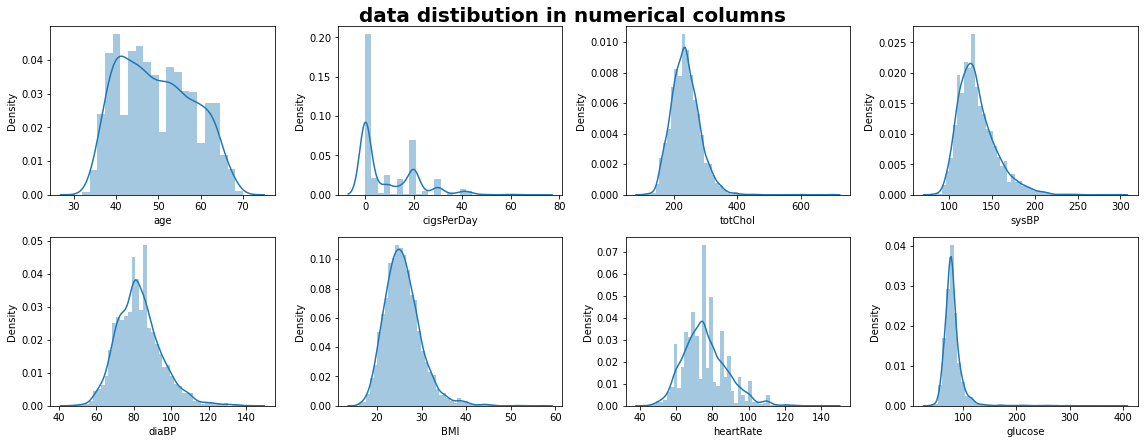

In [16]:
plt.figure(figsize=(16,6))
plt.suptitle('data distibution in numerical columns', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)
  sns.distplot(df[col])  
  plt.xlabel(col)
  plt.tight_layout()

### **Outlier Analysis**

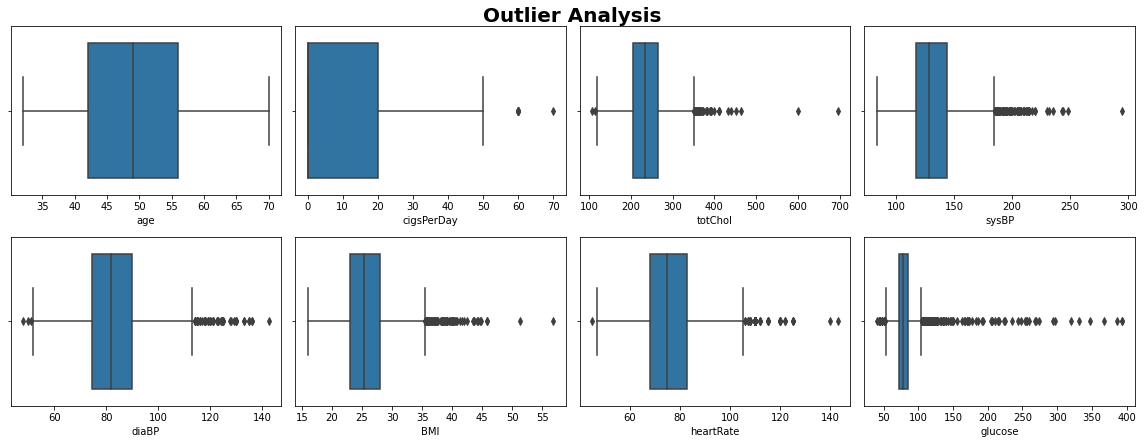

In [17]:
plt.figure(figsize=(16,6))
plt.suptitle('Outlier Analysis', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)
  sns.boxplot(df[col])
  plt.xlabel(col)
  plt.tight_layout()

In [18]:

df1 = df.copy()

for col in numeric_features:
  
  #usning IQR method to defined range of upper and lower limit.
  IQR = df1[col].quantile(0.75) - df1[col].quantile(0.25)
  upper_limit = df1[col].quantile(0.75) + (1.5 * IQR)
  lower_limit = df1[col].quantile(0.25) - (1.5 * IQR)

  # replcing with upper_limit, if outlier is higher than upper_limit.
  df1[col] = np.where(df1[col]>upper_limit, upper_limit, df1[col])
  
  # replcing with lower_limit, if outlier is lesser than lower_limit.
  df1[col] = np.where(df1[col]<lower_limit, lower_limit, df1[col])


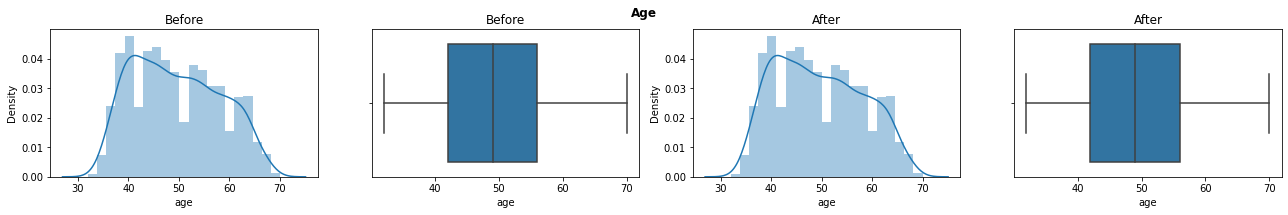

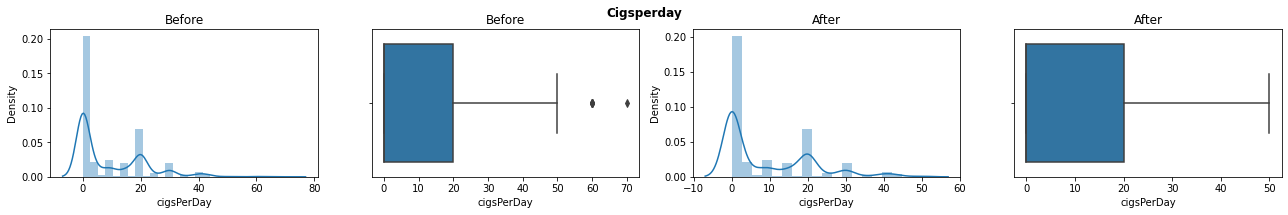

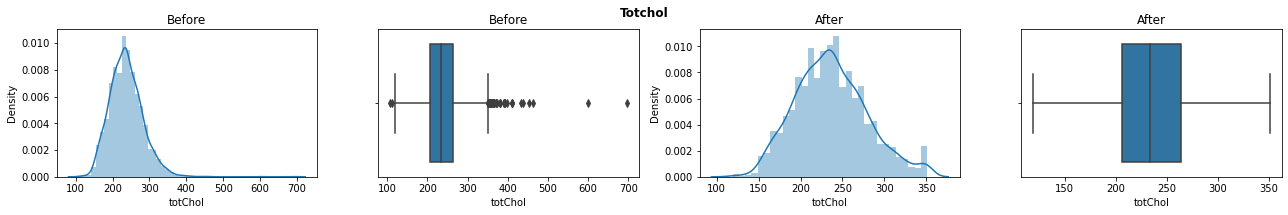

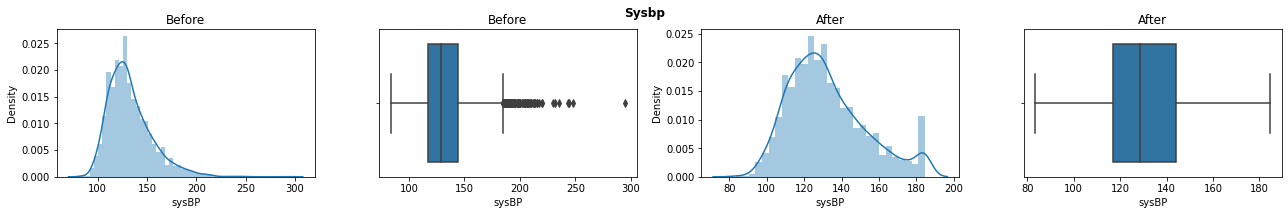

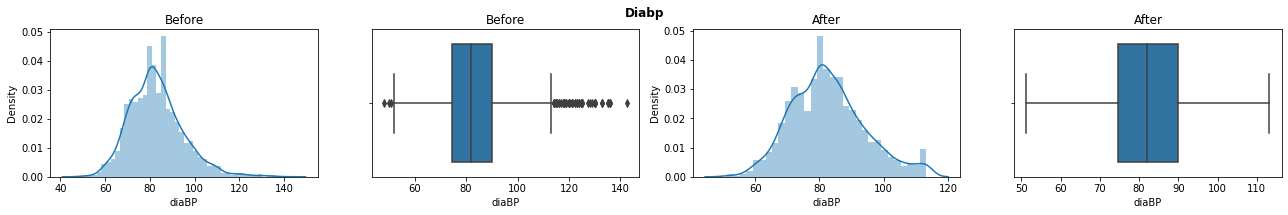

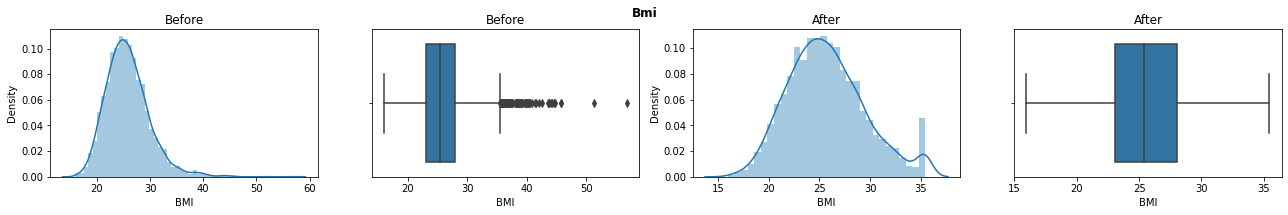

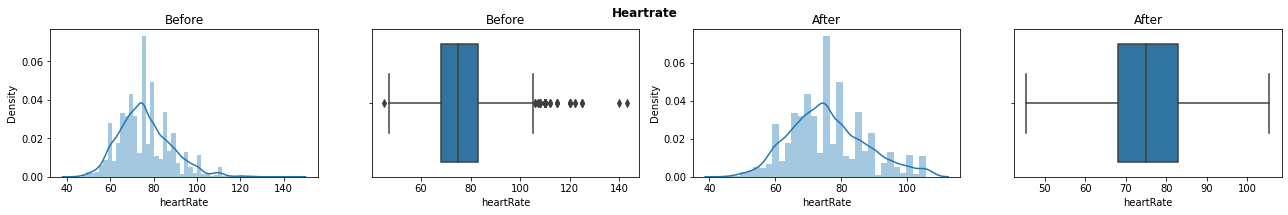

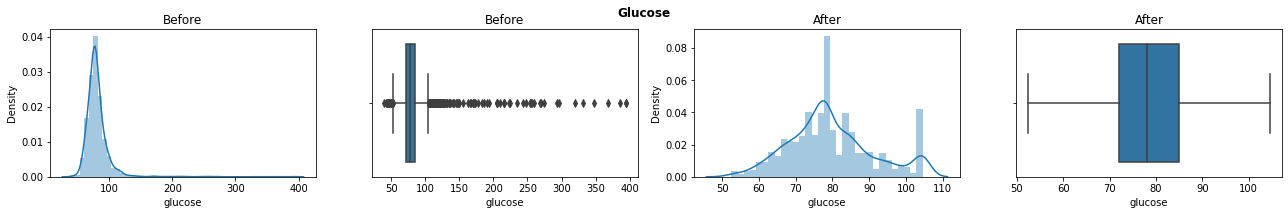

In [19]:
for col in numeric_features:
  fig, ax =plt.subplots(1,4, figsize=(18,3))
  
  # Before treating outliers 
  sns.distplot(df[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df[col], ax=ax[1]).set(title="Before")
  
  # After treating outliers
  sns.distplot(df1[col], ax=ax[2]).set(title="After")
  sns.boxplot(df1[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  plt.tight_layout()

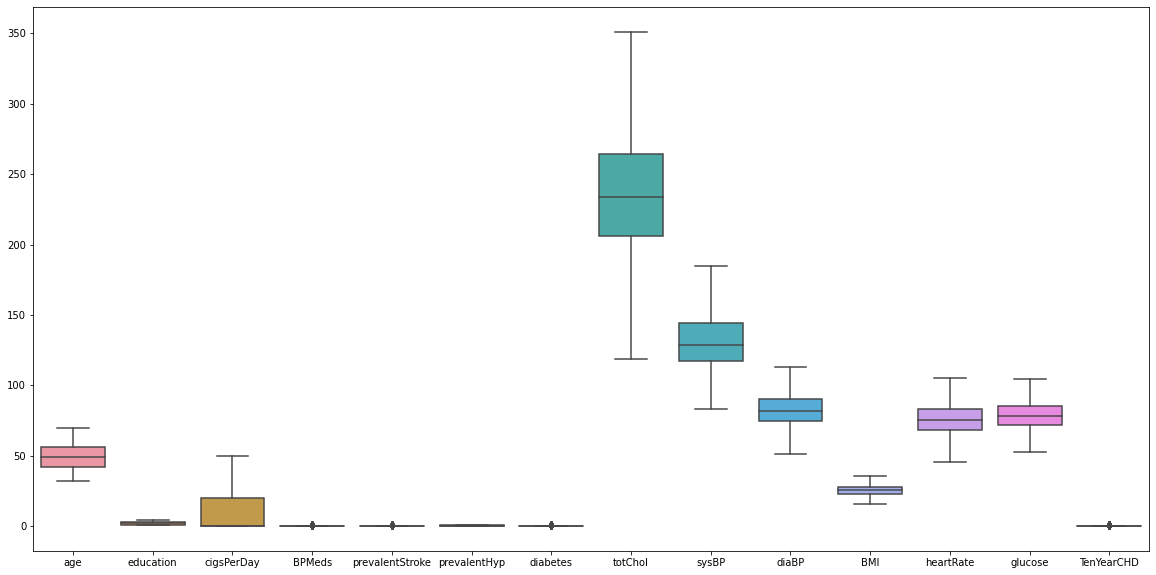

In [20]:
#Having a look at the box plot in order to look for the outliers
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=df1)
plt.show()

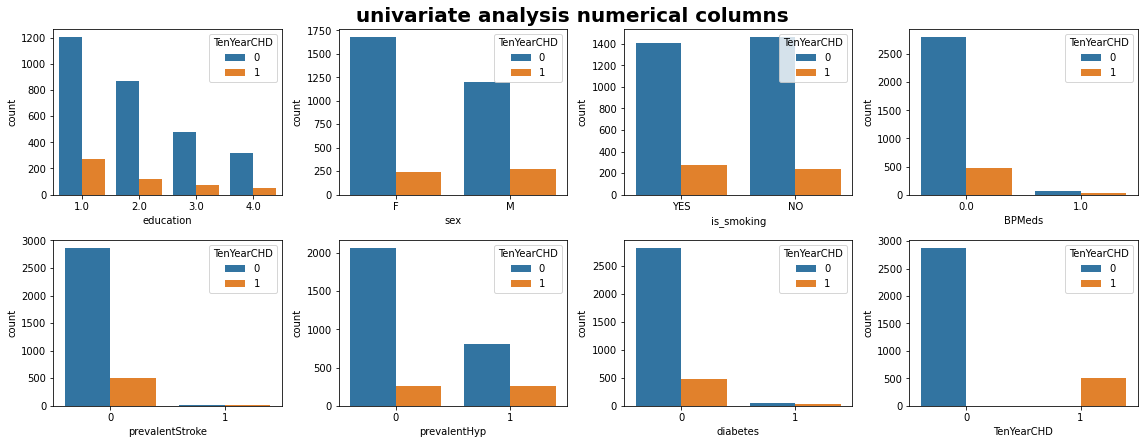

In [21]:
plt.figure(figsize=(16,6))
plt.suptitle('univariate analysis numerical columns', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(category_features):
  plt.subplot(2, 4, i+1)
  sns.countplot(df[col], hue='TenYearCHD', data=df)
  plt.xlabel(col)
  plt.tight_layout()

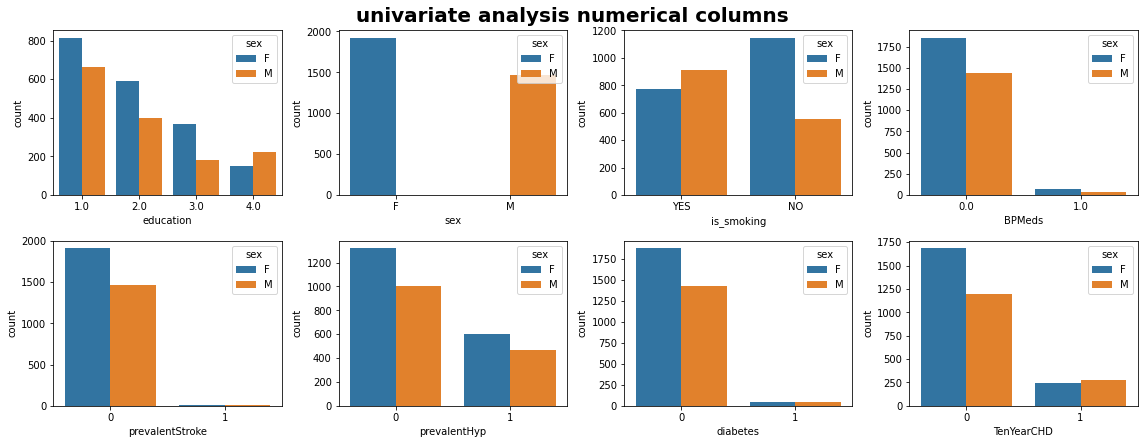

In [22]:
plt.figure(figsize=(16,6))
plt.suptitle('univariate analysis numerical columns', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(category_features):
  plt.subplot(2, 4, i+1)
  sns.countplot(df[col], hue='sex', data=df)
  plt.xlabel(col)
  plt.tight_layout()

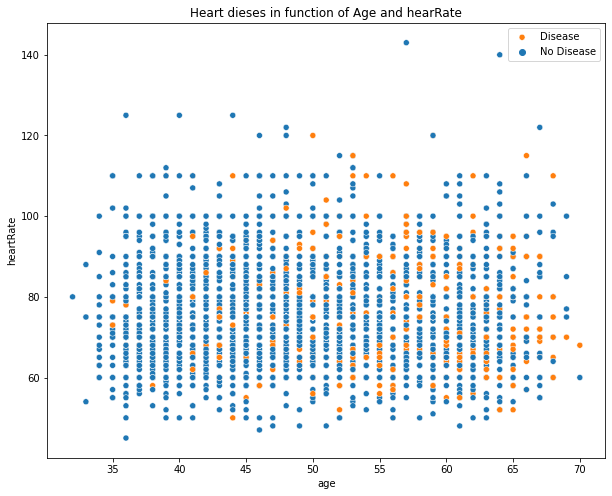

In [23]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='age', y='heartRate', hue='TenYearCHD', data=df)
plt.title('Heart dieses in function of Age and hearRate')
plt.legend(['Disease', 'No Disease'])

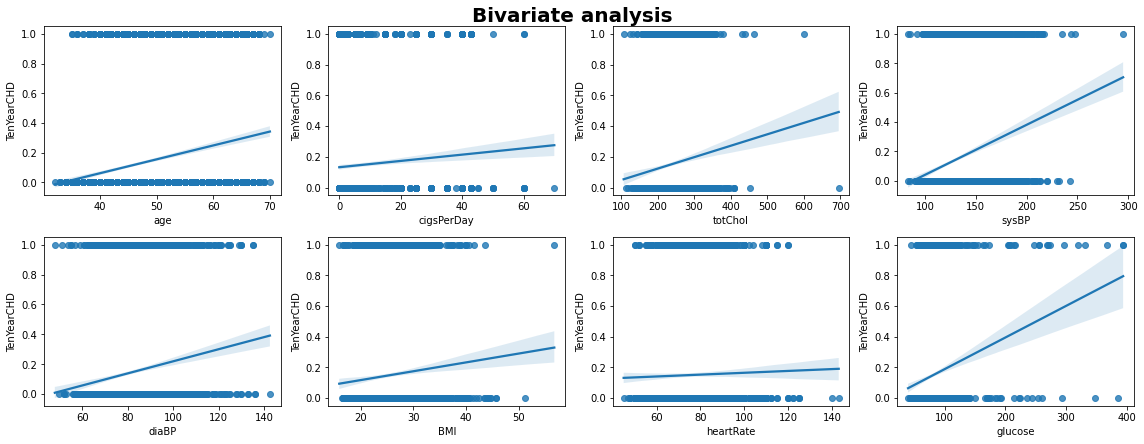

In [24]:
plt.figure(figsize=(16,6))
plt.suptitle('Bivariate analysis', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)
  sns.regplot(x=df[col], y='TenYearCHD', data=df)
  plt.xlabel(col)
  plt.tight_layout()

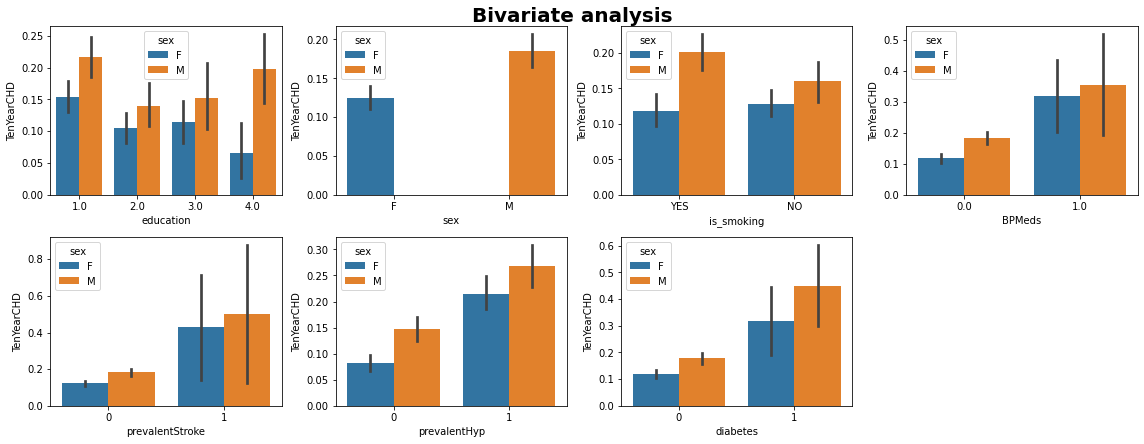

In [25]:
plt.figure(figsize=(16,6))
plt.suptitle('Bivariate analysis', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(category_features[:-1]):
  plt.subplot(2, 4, i+1)
  sns.barplot(x=df[col], y='TenYearCHD', hue='sex', data=df)
  plt.xlabel(col)
  plt.tight_layout()

### **Correlation Heatmap**

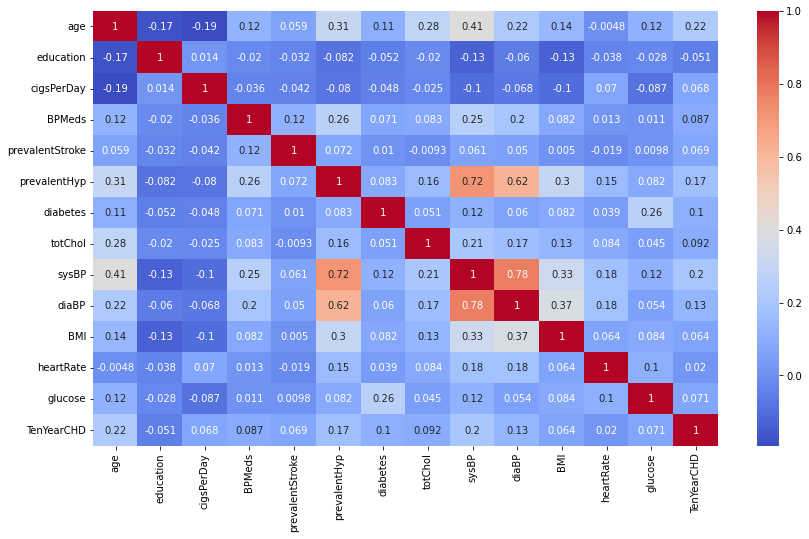

In [26]:
plt.figure(figsize=(14,8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

Blood pressure readings are given in two numbers.
* The top number of your blood pressure reading(systolic pressure).
* The bottom number of your blood pressure readings(diastolic pressure).

**The top number (systolic) minus the bottom number (diastolic) is the Pulse Pressure.** For example, if the resting blood pressure is 120/80 millimeters of mercury (mm Hg), the pulse pressure is 40 — which is considered a healthy pulse pressure. Generally, a pulse pressure greater than 40 mm Hg is unhealthy.

Measuring pulse pressure may help a health care provider predict the risk of a heart event, including a heart attack or stroke. A pulse pressure greater than 60 is considered a risk factor for cardiovascular disease, especially for older adults.

In [27]:

# adding new column PulsePressure 
df1['PulsePressure'] = df1['sysBP'] - df1['diaBP']

# dropping the sysBP and diaBP columns
df1.drop(columns=['sysBP', 'diaBP'], inplace=True)


In [28]:
numeric_features = ['age',
 'cigsPerDay',
 'totChol',
 'BMI',
 'heartRate',
 'glucose',
 'PulsePressure']

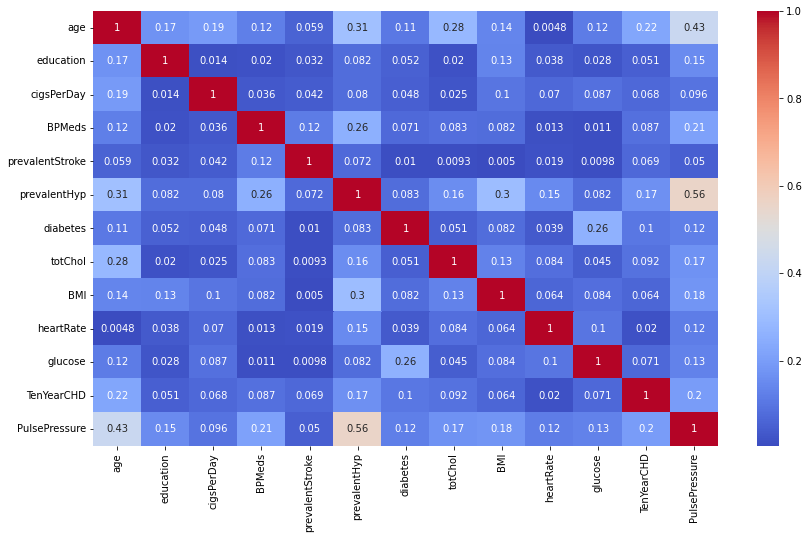

In [29]:
plt.figure(figsize=(14,8))
sns.heatmap(abs(df1.corr()), annot=True, cmap='coolwarm')

In [30]:
# checking data, weather the provide information is correct or not
df1[(df1.is_smoking == 'No') & (df1.cigsPerDay == 1)]

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,PulsePressure
id,,,,,,,,,,,,,,,


If people are Not Smoking and it shows in 'cigsPerDay' column is 1 or 5 or anything number, for that particular row we can say the provided information is false.
So, there is no false infomation available in the dataset.

### **Encoding**

In [31]:
df1['sex'] = df1['sex'].map({'M':1, 'F':0})
df1['is_smoking'] = df1['is_smoking'].map({'YES':1, 'NO':0})

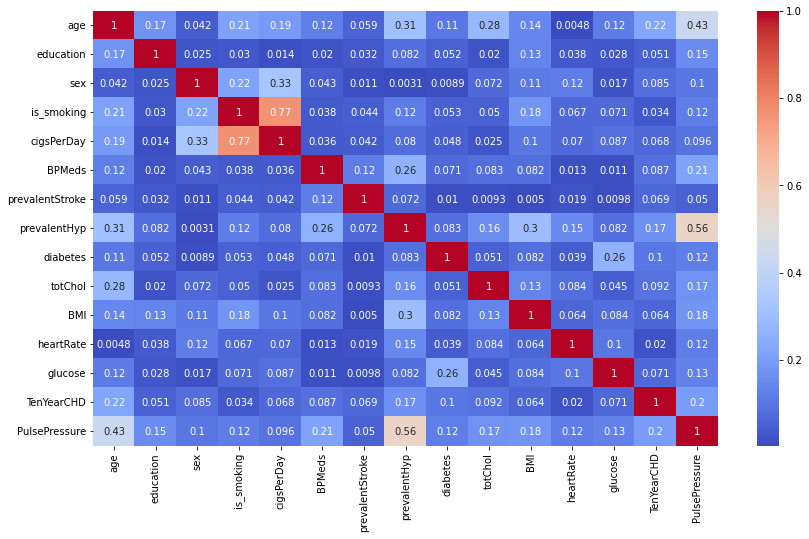

In [32]:
plt.figure(figsize=(14,8))
sns.heatmap(abs(df1.corr()), annot=True, cmap='coolwarm')

### **Feature Selection**

In [33]:

X = df1.drop('TenYearCHD', axis=1)
y= df1['TenYearCHD']


In [34]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ranked_features = pd.Series(model.feature_importances_,index=X.columns)
ranked_features.sort_values(ascending=False)

age                0.145364
PulsePressure      0.141102
BMI                0.130566
totChol            0.129820
glucose            0.121943
heartRate          0.118805
cigsPerDay         0.060572
education          0.059176
prevalentHyp       0.024511
sex                0.023016
is_smoking         0.014597
diabetes           0.012365
BPMeds             0.010750
prevalentStroke    0.007413
dtype: float64

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

### Apply SelectKBest Algorithm
ordered_rank_features = SelectKBest(score_func=chi2,k='all')
model = ordered_rank_features.fit(X,y)

feature_imp = pd.Series(model.scores_,index=X.columns)
feature_imp.sort_values(ascending=False)

PulsePressure      504.562956
age                255.538687
cigsPerDay         243.225903
totChol            221.707805
prevalentHyp        64.377708
diabetes            35.506306
glucose             28.487377
BPMeds              25.102438
prevalentStroke     15.861998
sex                 13.778390
BMI                  7.945880
education            4.761842
heartRate            2.315308
is_smoking           1.985226
dtype: float64

In [36]:

'''information gain ---> Information gain calculates the reduction in entropy from the transformation of a dataset. 
It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.'''

from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X,y)

mutual_data = pd.Series(mutual_info, index=X.columns)
mutual_data.sort_values(ascending=False)

age                0.022051
prevalentStroke    0.017164
education          0.016427
prevalentHyp       0.014381
glucose            0.012139
BMI                0.010255
BPMeds             0.009760
PulsePressure      0.008111
is_smoking         0.007883
sex                0.004155
totChol            0.002985
diabetes           0.002301
cigsPerDay         0.001461
heartRate          0.000000
dtype: float64

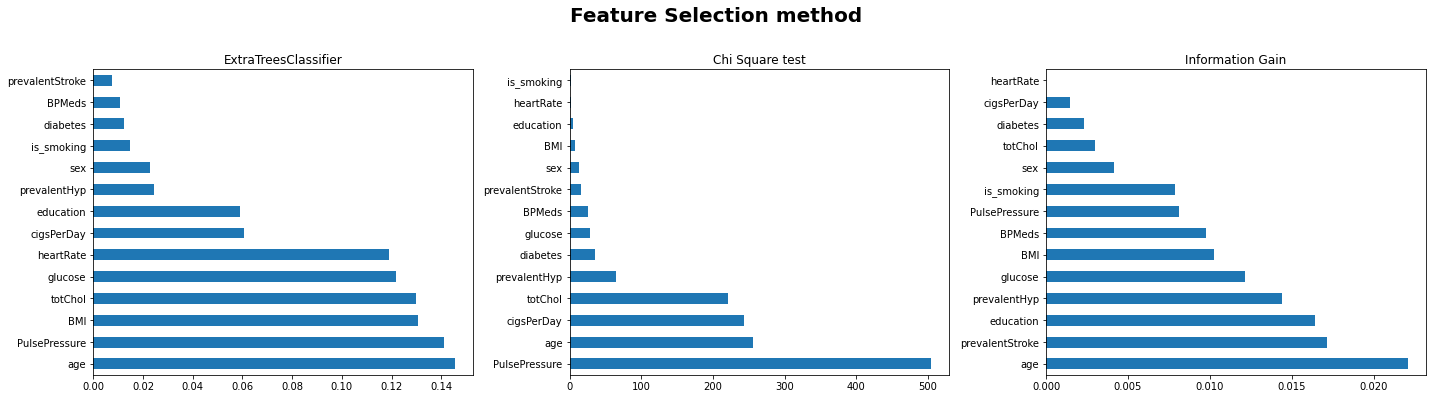

In [37]:
# checking for wich transformation is best for target variable
fig, axs = plt.subplots(1,3, figsize=(20,5))

ranked_features.sort_values(ascending=False).plot(kind='barh', title='ExtraTreesClassifier', ax=axs[0])
feature_imp.sort_values(ascending=False).plot(kind='barh', title='Chi Square test', ax=axs[1])
mutual_data.sort_values(ascending=False).plot(kind='barh', title='Information Gain', ax=axs[2])

plt.suptitle('Feature Selection method', fontsize=20, fontweight='bold', y=1.1)
plt.tight_layout()

based on feature importance graph we can see that 'is-smoking', 'education', 'prevalentStroke', 'diabetes', 'BPMeds' are provide less information about target variable. So, I we decide to drop these columns.

We are dealing with healthcare related data. So, every data is important to analysze or to make prediction on target variable, for that reason I am taking top 12 columns and remaining are dropped which are less contribute to evaluate inforamtion gain.

In [38]:
df1.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD', 'PulsePressure'],
      dtype='object')

In [39]:
df2 = df1.drop(columns=['is_smoking','education','prevalentStroke','diabetes','BPMeds'])
df2

,age,sex,cigsPerDay,prevalentHyp,totChol,BMI,heartRate,glucose,TenYearCHD,PulsePressure
id,,,,,,,,,,
0,64.0,0,3.0,0,221.0,25.38,90.0,80.0,1,63.00
1,36.0,1,0.0,1,212.0,29.77,72.0,75.0,0,70.00
2,46.0,0,10.0,0,250.0,20.35,88.0,94.0,0,45.00
3,50.0,1,20.0,1,233.0,28.26,68.0,94.0,1,70.00
4,64.0,0,30.0,0,241.0,26.42,70.0,77.0,0,51.50
...,...,...,...,...,...,...,...,...,...,...
3385,60.0,0,0.0,0,261.0,29.28,70.0,103.0,0,44.50
3386,46.0,0,0.0,0,199.0,21.96,80.0,84.0,0,46.00
3387,44.0,1,3.0,1,351.0,28.92,73.0,72.0,1,50.75


**Final feature that are provided to fit the model.**

In [40]:
# independent and dependent features

X = df2.drop(columns='TenYearCHD')
y = df2['TenYearCHD']


## **Checking data is Balanced or Imbalanced.**

In [41]:
# percentage distibution in target column
y.value_counts()/len(df)*100

0    84.926254
1    15.073746
Name: TenYearCHD, dtype: float64

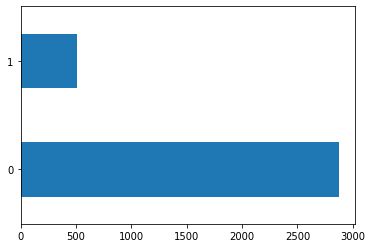

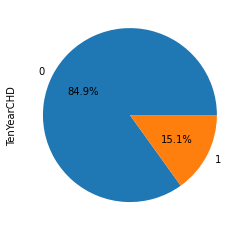

In [42]:
y.value_counts().plot(kind='barh')
plt.show()
y.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

When observation in one class is much higher than the observation in other classes then there exists a class imbalance.

We can clearly see that there is a huge difference between the data set. So, our **Data is Imbalanced**. Solving this issue we **use Synthetic Minority Oversampling Technique (SMOTE)** technique.

### **Handling Imbalance Data**
Oversampling the train dataset using **SMOTE technique**

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors. Repeat the steps until data is balanced. 

In [43]:

## Handling imbalance data using SMOTE techniques
from collections import Counter
from imblearn.over_sampling import SMOTE

print(f'Before Handling {Counter(y)}')

# Resampling the minority class
smote = SMOTE(sampling_strategy='minority', random_state=42)
X, y = smote.fit_resample(X, y)

print(f'After Handling {Counter(y)}')


Before Handling Counter({0: 2879, 1: 511})
After Handling Counter({1: 2879, 0: 2879})


## **Model Building**

### **Train Test Split**

In [44]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(X_train.shape)
print(X_test.shape)

(4606, 9)
(1152, 9)


### **Scaling Data**

In [45]:
# Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [73]:
model_result = []

def predict(ml_model, model_name):
  '''Pass the model and predict value. function will calculate all the metrics.
     Plotting confusion_matrix and roc_curve for test data''' 
  
  model = ml_model.fit(X_train, y_train)
  
  try:
    model_best=model.best_estimator_
    y_train_pred = model_best.predict(X_train)
    y_test_pred = model_best.predict(X_test)
    y_train_prob = model_best.predict_proba(X_train)[:,1]
    y_test_prob = model_best.predict_proba(X_test)[:,1]
  except:
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_prob = model.predict_proba(X_train)[:,1]
    y_test_prob = model.predict_proba(X_test)[:,1]

  
  ''' Performance Metrics ''' 
  # accuracy score
  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  print(f'train accuracy : {train_accuracy}')
  print(f'test accuracy : {test_accuracy}')

  # recall score
  train_recall = recall_score(y_train, y_train_pred)
  test_recall = recall_score(y_test, y_test_pred)
  print(f'train recall : {train_recall}')
  print(f'test recall : {test_recall}')

  # precision score
  train_precision = precision_score(y_train, y_train_pred)
  test_precision = precision_score(y_test, y_test_pred)
  print(f'train precision : {train_precision}')
  print(f'test precision : {test_precision}')

  # roc_auc score
  train_roc_auc = roc_auc_score(y_train, y_train_prob)
  test_roc_auc = roc_auc_score(y_test, y_test_prob)
  print(f'train roc_auc : {train_roc_auc}')
  print(f'test roc_auc : {test_roc_auc}')
  print('-'*100)

  # classificatio report
  print(f'classification report for test data \n{classification_report(y_test, y_test_pred)}')
  print('-'*100)

  
  ''' Confusion Matrix '''
  from sklearn.metrics import ConfusionMatrixDisplay
  ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
  plt.title('Test data', weight='bold')
  plt.show()
  print('-'*100)
  
  
  ''' ROC curve '''
  fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
  plt.plot(fpr,tpr, label=" auc="+str(test_roc_auc))
  plt.plot([0,1], [0,1], color='orange', linestyle='--')
  plt.title('ROC curve', weight='bold')
  plt.xlabel('False Positive Rate----->')
  plt.ylabel('True Positive Rate----->')
  plt.legend(loc=4)

  
  # appneding evalutaion metrics score to make final model_result.
  model_result.append({'model':model_name,
              'train_accuracy':train_accuracy, 
              'test_accuracy':test_accuracy,
              'train_recall':train_recall,
              'test_recall':test_recall,
              'train_precision':train_precision,
              'test_precision':test_precision})


train accuracy : 0.6693443334780721
test accuracy : 0.6744791666666666
train recall : 0.6904453091223519
test recall : 0.657243816254417
train precision : 0.6643094841930116
test precision : 0.6726943942133815
train roc_auc : 0.7299474763792659
test roc_auc : 0.7428966823044175
----------------------------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       586
           1       0.67      0.66      0.66       566

    accuracy                           0.67      1152
   macro avg       0.67      0.67      0.67      1152
weighted avg       0.67      0.67      0.67      1152

----------------------------------------------------------------------------------------------------


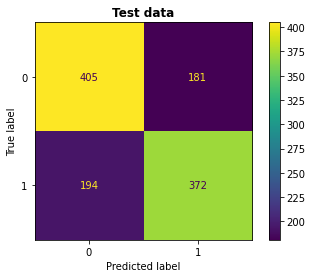

----------------------------------------------------------------------------------------------------


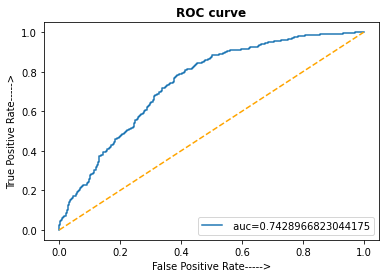

In [74]:
predict(LogisticRegression(), 'LogisticRegression')

In [75]:
pd.DataFrame(model_result)

,model,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision
0,LogisticRegression,0.669344,0.674479,0.690445,0.657244,0.664309,0.672694


In [99]:
def CM_and_ROCcurve(model, y_test_pred):
  
  print(f'ROC Curve on test data')
  fpr, tpr, _ = roc_curve(y_test, y_test_pred) # find fpr and tpr
  print(fpr, tpr)
  plt.plot(fpr,tpr)
  plt.plot([0,1], [0,1], color='orange', linestyle='--')
  plt.legend(loc=4)

  # plot_confusion_matrix(y_true=y_test, y_test_pred)
  print(confusion_matrix(y_test, y_test_pred))
  
  from sklearn.metrics import ConfusionMatrixDisplay
  ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

train accuracy : 1.0
test accuracy : 0.9114583333333334


train recall : 1.0
test recall : 0.8939929328621908

train precision : 1.0
test precision : 0.9233576642335767


train roc_auc : 1.0
test roc_auc : 0.9698078848032418


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2293
           1       1.00      1.00      1.00      2313

    accuracy                           1.00      4606
   macro avg       1.00      1.00      1.00      4606
weighted avg       1.00      1.00      1.00      4606

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       586
           1       0.92      0.89      0.91       566

    accuracy                           0.91      1152
   macro avg       0.91      0.91      0.91      1152
weighted avg       0.91      0.91      0.91      1152


**** Plot ROC-AUC Curve ****
[0.         0.07167235 1.        ] [0.

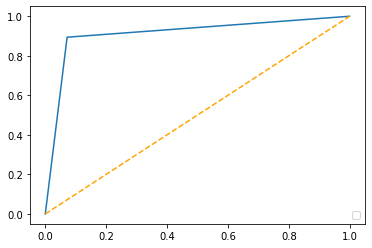

[[544  42]
 [ 60 506]]


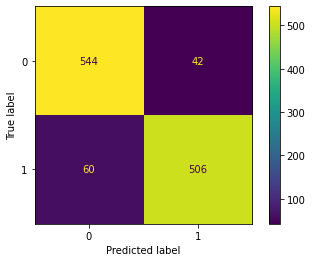

In [109]:
evaluation_metrics(RandomForestClassifier(), X_train,y_train)

In [110]:
from imblearn.over_sampling import SMOTE

In [121]:

model_result = []

def predict(ml_model, X,y):
  
  #train test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)
  
  #standrdization
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  # handling imbalance data
  X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)

  # model fitting
  global model1
  model1 = ml_model
  model = model1.fit(X_train, y_train)
  
  try:
    # for Hyperparamteter Tuning 
    model_best=model.best_estimator_
    y_train_pred = model_best.predict(X_train)
    y_test_pred = model_best.predict(X_test)
    y_train_prob = model_best.predict_proba(X_train)[:,1]
    y_test_prob = model_best.predict_proba(X_test)[:,1]
  except:
    # model prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_prob = model.predict_proba(X_train)[:,1]
    y_test_prob = model.predict_proba(X_test)[:,1]

  
  ''' Performance Metrics''' 
  global train_accuracy, test_accuracy, train_recall, test_recall, train_precision, test_precision

  # accuracy score
  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  print(f'train accuracy : {train_accuracy}')
  print(f'test accuracy : {test_accuracy}')
  print('\n')

  # recall score
  train_recall = recall_score(y_train, y_train_pred)
  test_recall = recall_score(y_test, y_test_pred)
  print(f'train recall : {train_recall}')
  print(f'test recall : {test_recall}')
  print()

  # precision score
  train_precision = precision_score(y_train, y_train_pred)
  test_precision = precision_score(y_test, y_test_pred)
  print(f'train precision : {train_precision}')
  print(f'test precision : {test_precision}')
  print('\n')

  # roc_auc score
  train_roc_auc = roc_auc_score(y_train, y_train_prob)
  test_roc_auc = roc_auc_score(y_test, y_test_prob)
  print(f'train roc_auc : {train_roc_auc}')
  print(f'test roc_auc : {test_roc_auc}')
  print('\n')

  print(f'classification report for train data \n{classification_report(y_train, y_train_pred)}')
  print('-'*100)
  print(f'classification report for test data \n{classification_report(y_test, y_test_pred)}')


  '''roc curve on test data'''
  # fpr, tpr, threshold = roc_curve(y_test, y_test_pred)
  # auc = roc_auc_score(y_test, y_test_prob[:,1])
  # plt.plot(fpr,tpr,label=" auc="+str(auc))
  # plt.plot([0,1], [0,1], color='orange', linestyle='--')
  # plt.legend(oc=4)
  # plt.title ('roc curve')
  # plt.show()

  
  # Getting the prediction probabilities for test set 
  y_pred_proba = model.predict_proba(X_test)[:,1]  #calculating probabilities for X_test
  # Getting parameters for ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  #Calculating roc_curve
  # Plotting the ROC curve
  plt.plot([0,1],[0,1],linestyle ='--')   
  plt.plot(fpr,tpr, marker ='.')
  plt.xlabel('False positive rate')  #xtitle
  plt.ylabel('True positive Rate')  #ytitle
  plt.title('logistic regression ROC curve')   #title
  plt.show()

  # print('\n**** Plot ROC-AUC Curve ****')
  # fpr, tpr, _ = roc_curve(y_test, y_test_pred) # find fpr and tpr
  # print(fpr,tpr)
  # plt.plot(fpr,tpr,label="data 1, auc="+str(test_roc_auc))
  # plt.plot([0,1], [0,1], color='orange', linestyle='--')
  # plt.legend(loc=4)
  # plt.show()

  # plot_confusion_matrix(y_true=y_test, y_test_pred)
  print(confusion_matrix(y_test, y_test_pred))
  
  from sklearn.metrics import ConfusionMatrixDisplay
  ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

  model_result.append({'model_name': model1,
              'train_accuracy':train_accuracy, 
              'test_accuracy':test_accuracy,
              'train_recall':train_recall,
              'test_recall':test_recall,
              'train_precision':train_precision,
              'test_precision':test_precision})

In [122]:
model_result

[]

train accuracy : 0.6768266320795504
test accuracy : 0.6805555555555556


train recall : 0.6930393428447903
test recall : 0.6431095406360424

train precision : 0.6712730318257957
test precision : 0.6867924528301886


train roc_auc : 0.7394214807599819
test roc_auc : 0.7533647294347495


classification report for train data 
              precision    recall  f1-score   support

           0       0.68      0.66      0.67      2313
           1       0.67      0.69      0.68      2313

    accuracy                           0.68      4626
   macro avg       0.68      0.68      0.68      4626
weighted avg       0.68      0.68      0.68      4626

----------------------------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       586
           1       0.69      0.64      0.66       566

    accuracy                           0.68   

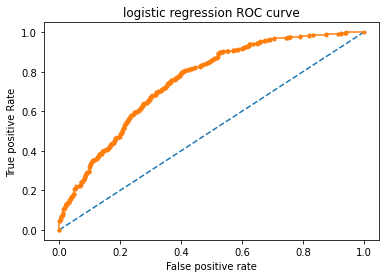

[[420 166]
 [202 364]]


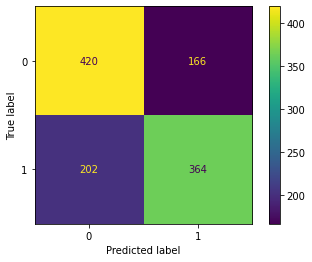

In [123]:
predict(LogisticRegression(), X,y)

train accuracy : 1.0
test accuracy : 0.9192708333333334


train recall : 1.0
test recall : 0.8957597173144877

train precision : 1.0
test precision : 0.9371534195933456


train roc_auc : 1.0
test roc_auc : 0.9714676370916194


classification report for train data 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2313
           1       1.00      1.00      1.00      2313

    accuracy                           1.00      4626
   macro avg       1.00      1.00      1.00      4626
weighted avg       1.00      1.00      1.00      4626

----------------------------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       586
           1       0.94      0.90      0.92       566

    accuracy                           0.92      1152
   macro avg       0.92      0.92      0.92      115

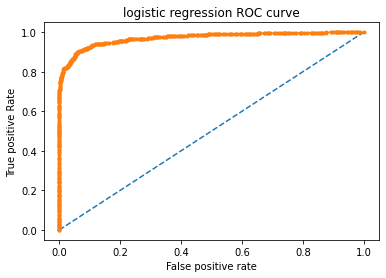

[[552  34]
 [ 59 507]]


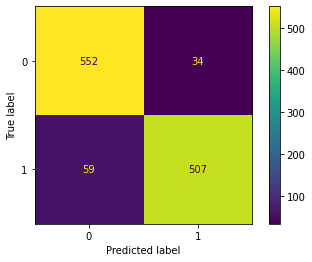

In [124]:
predict(RandomForestClassifier(n_estimators=1000), X,y)

In [125]:
from xgboost import XGBClassifier

train accuracy : 0.9690877648076092
test accuracy : 0.8940972222222222


train recall : 0.9407695633376567
test recall : 0.8498233215547704

train precision : 0.997250229147571
test precision : 0.9285714285714286


train roc_auc : 0.9968050282160513
test roc_auc : 0.9410840699960203


classification report for train data 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2313
           1       1.00      0.94      0.97      2313

    accuracy                           0.97      4626
   macro avg       0.97      0.97      0.97      4626
weighted avg       0.97      0.97      0.97      4626

----------------------------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       586
           1       0.93      0.85      0.89       566

    accuracy                           0.89    

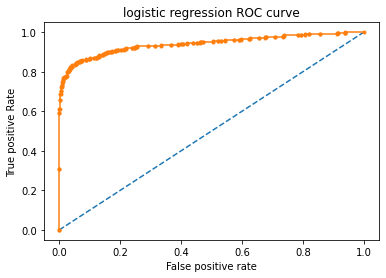

[[549  37]
 [ 85 481]]


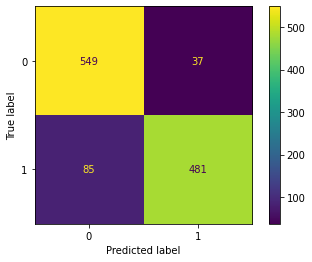

In [126]:
predict(XGBClassifier(n_estimators=1000), X,y)

In [115]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train,y_train)

In [78]:
y_test_pred = lr.predict(X_test)
y_test_prob = lr.predict_proba(X_test)

# roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_curve(y_test, y_test_pred)

(array([0.        , 0.37217391, 1.        ]),
 array([0.       , 0.7184466, 1.       ]),
 array([2, 1, 0]))

In [79]:
#defining algorithm function
def algorithm(model_name):                             #creating the model function which will take model name as the input
  model_obj = model_name
  model_obj.fit(X_train,y_train)   # will fit on X_train and Y_train

  y_train_pred = model_obj.predict(X_train)  # predicting y_train_pred and y_test_pred
  y_test_pred  = model_obj.predict(X_test)

  y_train_prob = model_obj.predict_proba(X_train)    #predicting the probabilities of each class ...
  y_test_prob = model_obj.predict_proba(X_test)

  # evaluation metrics on test data
  train_accuracy =  accuracy_score(y_train, y_train_pred)
  train_recall = recall_score(y_train, y_train_pred)
  train_precision = precision_score(y_train, y_train_pred)

  return 

In [80]:
# # Defining a function to train the input model and print evaluation matrix
# def analyse_model(model, X_train, X_test, y_train, y_test):

#   '''Takes classifer model and train test splits as input and prints the
#   evaluation matrices with the plot and returns the model'''

#   # Fitting the model
#   model.fit(X_train,y_train)

#   # Feature importances
#   try:
#     try:
#       importance = model.feature_importances_
#       feature = X_train.columns
#     except:
#       importance = np.abs(model.coef_[0])
#       feature = X.columns
#     indices = np.argsort(importance)
#     indices = indices[::-1]
#   except:
#     pass
  
#   # Plotting Evaluation Metrics for train and test dataset
#   for x, act, label in ((X_train, y_train, 'Train-Set'),(X_test, y_test, "Test-Set")):
#     # Getting required metrics
#     pred = model.predict(x)
#     pred_proba = model.predict_proba(x)[:,1]
#     report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
#     # report = classification_report(y_pred=pred, y_true=act)
#     fpr, tpr, thresholds = roc_curve(act, pred_proba)

#     # Classification report
#     # print(report)
#     plt.figure(figsize=(18,3))
#     plt.subplot(1,3,1)
#     sns.heatmap(report.iloc[:-1, :].T, annot=True, cmap='coolwarm')
#     plt.title(f'{label} Report')

#     # Confusion Matrix
#     plt.subplot(1,3,2)
#     sns.heatmap(confusion_matrix(y_true=act, y_pred=pred), annot=True, cmap='coolwarm')
#     plt.title(f'{label} Confusion Matrix')
#     plt.xlabel('Predicted labels')
#     plt.ylabel('Actual labels')

#     # AUC_ROC Curve
#     plt.subplot(1,3,3)
#     plt.plot([0,1],[0,1],'k--')
#     plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
#     plt.legend(loc=4)
#     plt.title(f'{label} AUC_ROC Curve')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.tight_layout()

#     try:
#       plt.figure(figsize=(18,3))
#       plt.bar(range(len(indices)),importance[indices])
#       plt.xticks(range(len(indices)), [feature[i] for i in indices])
#       plt.title('Feature Importance')
#       plt.tight_layout()
#     except:
#       pass
#       plt.show()

#   print(f'predected percent of people with Cardiovascular Risk  : {(sum( pred)/ pred.size )*100}')

#   return model

In [86]:
print(f'train data score : {lr.score(X_train, y_train)}')
print(f'test data score : {lr.score(X_test, y_test)}')

train data score : 0.6614583333333334
test data score : 0.6415929203539823


In [96]:
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
test_roc = roc_auc_score(y_test, y_test_pred)

In [101]:
roc_auc_score(y_test, y_test_prob[:,1])

0.7480962431405656

In [102]:
roc_auc_score(y_test, y_test_pred)

0.6731363444491347

In [98]:
roc_curve(y_test, y_test_pred)

(array([0.        , 0.37217391, 1.        ]),
 array([0.       , 0.7184466, 1.       ]),
 array([2, 1, 0]))

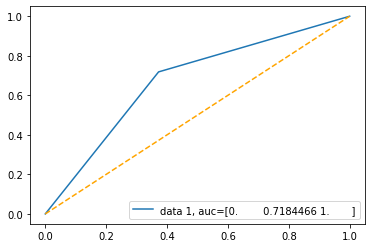

In [99]:
fpr, tpr, _ = roc_curve(y_test, y_test_pred) # find fpr and tpr
plt.plot(fpr,tpr,label="data 1, auc="+str(tpr))
plt.plot([0,1], [0,1], color='orange', linestyle='')
plt.legend(loc=4)
plt.show()

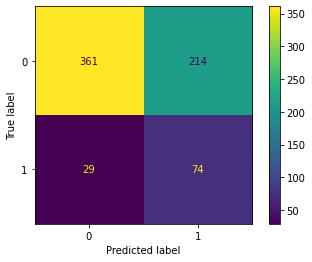

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

In [90]:
roc_curve(y_test, y_test_pred)

(array([0.        , 0.37217391, 1.        ]),
 array([0.       , 0.7184466, 1.       ]),
 array([2, 1, 0]))

In [91]:
fpr, tpr, _

(array([0.        , 0.37217391, 1.        ]),
 array([0.       , 0.7184466, 1.       ]),
 array([2, 1, 0]))

In [92]:
X.columns

Index(['age', 'prevalentHyp', 'sysBP', 'diaBP', 'BMI', 'sex', 'education',
       'cigsPerDay', 'totChol', 'heartRate'],
      dtype='object')

In [62]:
lr.coef_ 

array([[ 0.57326681,  0.03062166,  0.34558711,  0.0071137 , -0.00540306,
         0.12615839, -0.13343731,  0.34900246,  0.05243389, -0.0563939 ]])

In [63]:
from sklearn.metrics import f1_score, accuracy_score, recall_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report

In [64]:
# Get the predicted classes
train_class_preds = lr.predict(X_train)
test_class_preds = lr.predict(X_test)

In [65]:
#evaluation function
def evaluation(Y,y,y_proba):    #creating evaluation function to get all the evaluation parameters in a single time..

  # print(f'Accuracy:\n{accuracy_score(Y, y)}')
  # print()
  # print(f'Confusion Matrix:\n{confusion_matrix(Y, y)}')
  print()
  print(f'Classification Report:\n{classification_report(Y, y)}')  #classification report for the model
  
  precision = precision_score(Y, y)   #Calculating precision
  recall = recall_score(Y, y)  #calculating recall
  f1Score = f1_score(Y,y)  # calculating f1score
  accuracy = accuracy_score(Y, y)  #calculating accuracy
  ROC_AUC_Score = roc_auc_score(Y,y_proba)  #calculating ROC_AUC_score.

  return precision,recall,f1Score,accuracy,ROC_AUC_Score   #returning the parameters